## Topic: Building your first Deep Convolutional Neural Network using Keras

### Author: Himanshu Rawlani

### This notebook demonstrates how to train a simple deep CNN on the CIFAR10 small images dataset.

### 1. Importing required libraries

In [3]:
'''
#Train a simple deep CNN on the CIFAR10 small images dataset.

It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### 2. Setting model hyper parameters

In [4]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

### 3. Loading training dataset

In [5]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### 4. Pre-processing the input data

In [6]:
cifar_10_classes = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

In [7]:
# Convert class vectors to binary class matrices.
Y_train = keras.utils.to_categorical(y_train, num_classes)
Y_test = keras.utils.to_categorical(y_test, num_classes)

### 5. Building deep convolutional Neural Network model (Using Sequential API)

In [20]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

### 6. Visualising the keras model

In [0]:
from IPython.display import display, HTML
from keras.utils import plot_model

def plot_model_architecture(base_model, model_name):
    plot_model(base_model, show_shapes=True, to_file=model_name)
    display(HTML('<img src="{}" style="display:inline;margin:1px"/>'.format(model_name)))
    
plot_model_architecture(model, 'model.svg')

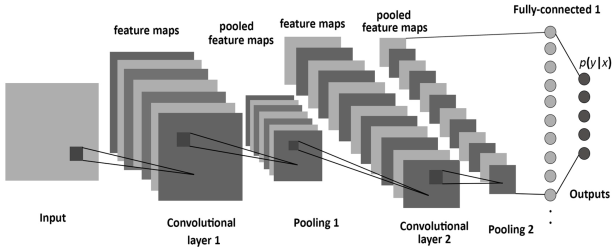

### 7. Visualising the data

In [8]:
# Normalising data from (0. 255) to range (0, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [18]:
print('x_train.shape:', x_train.shape)
print('x_test.shape:', x_test.shape)

x_train.shape: (50000, 32, 32, 3)
x_test.shape: (10000, 32, 32, 3)


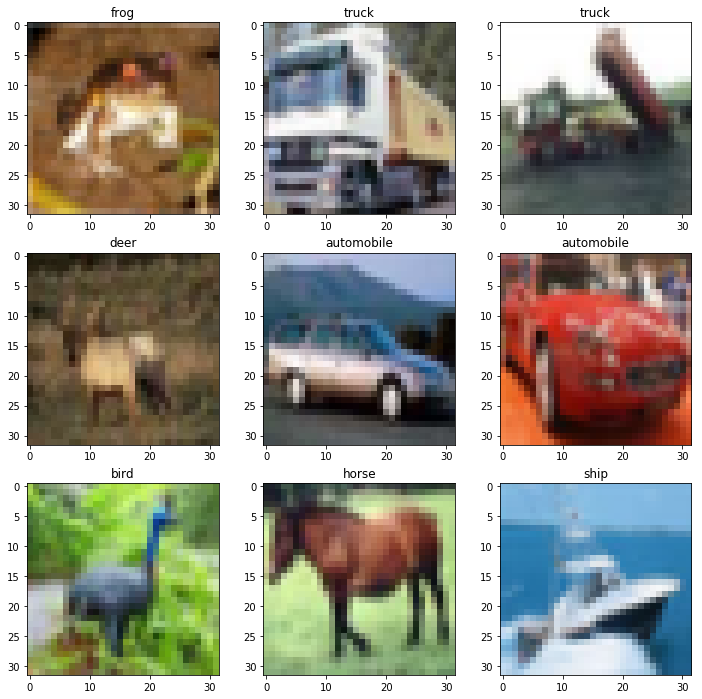

In [19]:
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(cifar_10_classes[np.argmax(Y_train[i])])

### 7. Performing model training

In [10]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, Y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, Y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, Y_test),
                        workers=4)

Not using data augmentation.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 24s 481us/step - loss: 1.8271 - acc: 0.3329 - val_loss: 1.5291 - val_acc: 0.4461
Epoch 2/100
50000/50000 [==============================] - 20s 394us/step - loss: 1.4951 - acc: 0.4579 - val_loss: 1.3640 - val_acc: 0.5141
Epoch 3/100
50000/50000 [==============================] - 20s 396us/step - loss: 1.3496 - acc: 0.5155 - val_loss: 1.2852 - val_acc: 0.5414
Epoch 4/100
50000/50000 [==============================] - 23s 450us/step - loss: 1.2570 - acc: 0.5532 - val_loss: 1.1663 - val_acc: 0.5910
Epoch 5/100
50000/50000 [==============================] - 23s 452us/step - loss: 1.1826 - acc: 0.5806 - val_loss: 1.0992 - val_acc: 0.6127
Epoch 6/100
50000/50000 [==============================] - 20s 409us/step - loss: 1.1222 - acc: 0.6045 - val_loss: 1.0673 - val_acc: 0.6227
Epoch 7/100
50000/50000 [========

### 8. Evaluating the trained model

In [11]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 
10000/10000 [==============================] - 1s 144us/step
Test loss: 0.7055528617858887
Test accuracy: 0.7773


### 9. Testing our model on a sample image

Text(0.5,1,'ship')

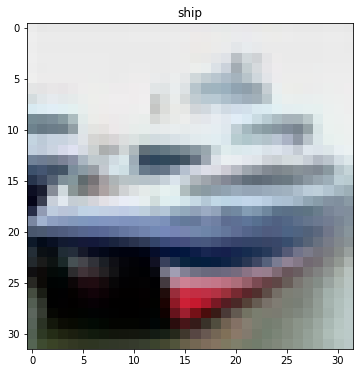

In [23]:
img_index = 1

test_img = x_test[img_index]
plt.figure(figsize=(6, 6))
plt.imshow(test_img)
plt.title(cifar_10_classes[np.argmax(Y_test[img_index])])

In [24]:
from keras.models import load_model
saved_model = load_model('saved_models/keras_cifar10_trained_model.h5')

predictions = saved_model.predict(np.expand_dims(test_img, axis=0))
index = np.argmax(predictions)
print('Saved model prediction: {} (Confidence: {})'.format(cifar_10_classes[index], predictions[0][index]))

Saved model prediction: ship (Confidence: 0.6754716634750366)


References:
* https://github.com/keras-team/keras/tree/master/examples